In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
import pandas
from time import time

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.utils import *
from LazyLuna.Views import *

In [2]:
# basepaths
bp       = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases'
bp_annos = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases'
bp_cases = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Cases'
bp_imgs  = '/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs'

In [6]:

imgsanno_paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)
imgsanno_paths = [p for p in imgsanno_paths if os.path.exists(p[1])]

cases = []
sax_cine_view = SAX_CINE_View()
sax_cs_view   = SAX_CS_View()
for imgp, annop in imgsanno_paths:
    print(imgp, annop)
    st = time()
    case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
    case = sax_cs_view.initialize_case(case)
    case = sax_cine_view.initialize_case(case)
    case.store(bp_cases)
    cases.append(case)
    print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
    

/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS134_075Y /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.530.1584969841.495256
Case customization took:  2.933058023452759 Case:  Unet ECSPRESS134_075Y
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-104 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575885854.552374
Case customization took:  2.782317876815796 Case:  Unet ECSPRESS-104
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-103 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575885830.550369
Case customization took:  3.2092502117156982 Case:  Unet ECSPRESS-103
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS146_061Y /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.530.1584972381.520154
Exception in SAX_Slice_Phase_Category,  'FileDataset' object has no attribute 'SpacingBetweenSlices'
Exception in SAX_Slice_Phase_Category,  'FileDataset' objec

Case customization took:  3.7581839561462402 Case:  Unet ECSPRESS-065
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-096 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575885676.537411
Case customization took:  2.821500062942505 Case:  Unet ECSPRESS-096
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-062 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575884758.461832
Case customization took:  3.4314281940460205 Case:  Unet ECSPRESS-062
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-054 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575884561.445497
Case customization took:  3.4517788887023926 Case:  Unet ECSPRESS-054
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS149_053Y /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.530.1584972846.527038
Case customization took:  4.585773944854736 Case:  Unet ECSPRESS149_053Y
/Users/thomas/Desktop/Da

Case customization took:  3.190662145614624 Case:  Unet ECSPRESS-128
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS144_036Y /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.530.1584971813.515899
Case customization took:  3.86680006980896 Case:  Unet ECSPRESS144_036Y
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-117 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575886257.585635
Case customization took:  2.4891302585601807 Case:  Unet ECSPRESS-117
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-109 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575885957.560897
Case customization took:  3.8654520511627197 Case:  Unet ECSPRESS-109
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-100 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575885762.544659
Case customization took:  3.2420051097869873 Case:  Unet ECSPRESS-100
/Users/thomas/Desktop/Dat

Case customization took:  2.335458993911743 Case:  Unet ECSPRESS-088
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-043 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575884309.424358
Case customization took:  3.1194651126861572 Case:  Unet ECSPRESS-043
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-017 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575883721.373114
Case customization took:  3.047173261642456 Case:  Unet ECSPRESS-017
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-028 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575883957.394073
Case customization took:  4.316685914993286 Case:  Unet ECSPRESS-028
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-010 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575883567.359601
Exception in SAX_Slice_Phase_Category,  'FileDataset' object has no attribute 'SpacingBetweenSlices'
Ex

Case customization took:  3.296602725982666 Case:  Unet ECSPRESS-050
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS157_053Y /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.530.1584974052.545247
Case customization took:  4.112089157104492 Case:  Unet ECSPRESS157_053Y
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-068 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575884906.473885
Case customization took:  3.427724838256836 Case:  Unet ECSPRESS-068
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-034 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575884097.406662
Case customization took:  3.143850088119507 Case:  Unet ECSPRESS-034
/Users/thomas/Desktop/Data/CineCS_Dataset/Imgs/ECSPRESS-033 /Users/thomas/Desktop/Data/CineCS_Dataset/Unet/1.2.276.0.7230010.3.1.2.0.458.1575884078.404950
Case customization took:  2.9434328079223633 Case:  Unet ECSPRESS-033
/Users/thomas/Desktop/Data

In [4]:
case_paths = [p for p in os.listdir(bp_cases) if 'Annos' in p and p.endswith('.pickle')]
cases1 = sorted([pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in case_paths], key=lambda c:c.case_name)
case_paths = [p for p in os.listdir(bp_cases) if 'FCN' in p and p.endswith('.pickle')]
cases2 = sorted([pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in case_paths], key=lambda c:c.case_name)
case_paths = [p for p in os.listdir(bp_cases) if 'MRUNet' in p and p.endswith('.pickle')]
cases3 = sorted([pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in case_paths], key=lambda c:c.case_name)
case_paths = [p for p in os.listdir(bp_cases) if 'UNet' in p and 'MRUNet' not in p and p.endswith('.pickle')]
cases4 = sorted([pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in case_paths], key=lambda c:c.case_name)

In [5]:
case_names = set([c.case_name for c in cases2])
cases1 = [c for c in cases1 if c.case_name in case_names]
print(len(cases1))

29


In [ ]:
# get table of CRs, CR means and stdevs & wilcoxon test result diffs
df, stats, wilcox_tests = clinical_result_pandas_table(cases1, cases4, with_dices=True)
display(df)
print(stats['LVESV difference'])
print('Mean: ', stats['LVESV difference'].mean())
print(wilcox_tests['RVESV difference'])
pandas.DataFrame.to_csv(df, os.path.join(bp, 'UNet_cr_table.csv'), sep=';', decimal=',')

LVESV difference False
LVEDV difference False
LVEF difference False
LVMYOMASS difference True
RVESV difference False
RVEDV difference False
RVEF difference False


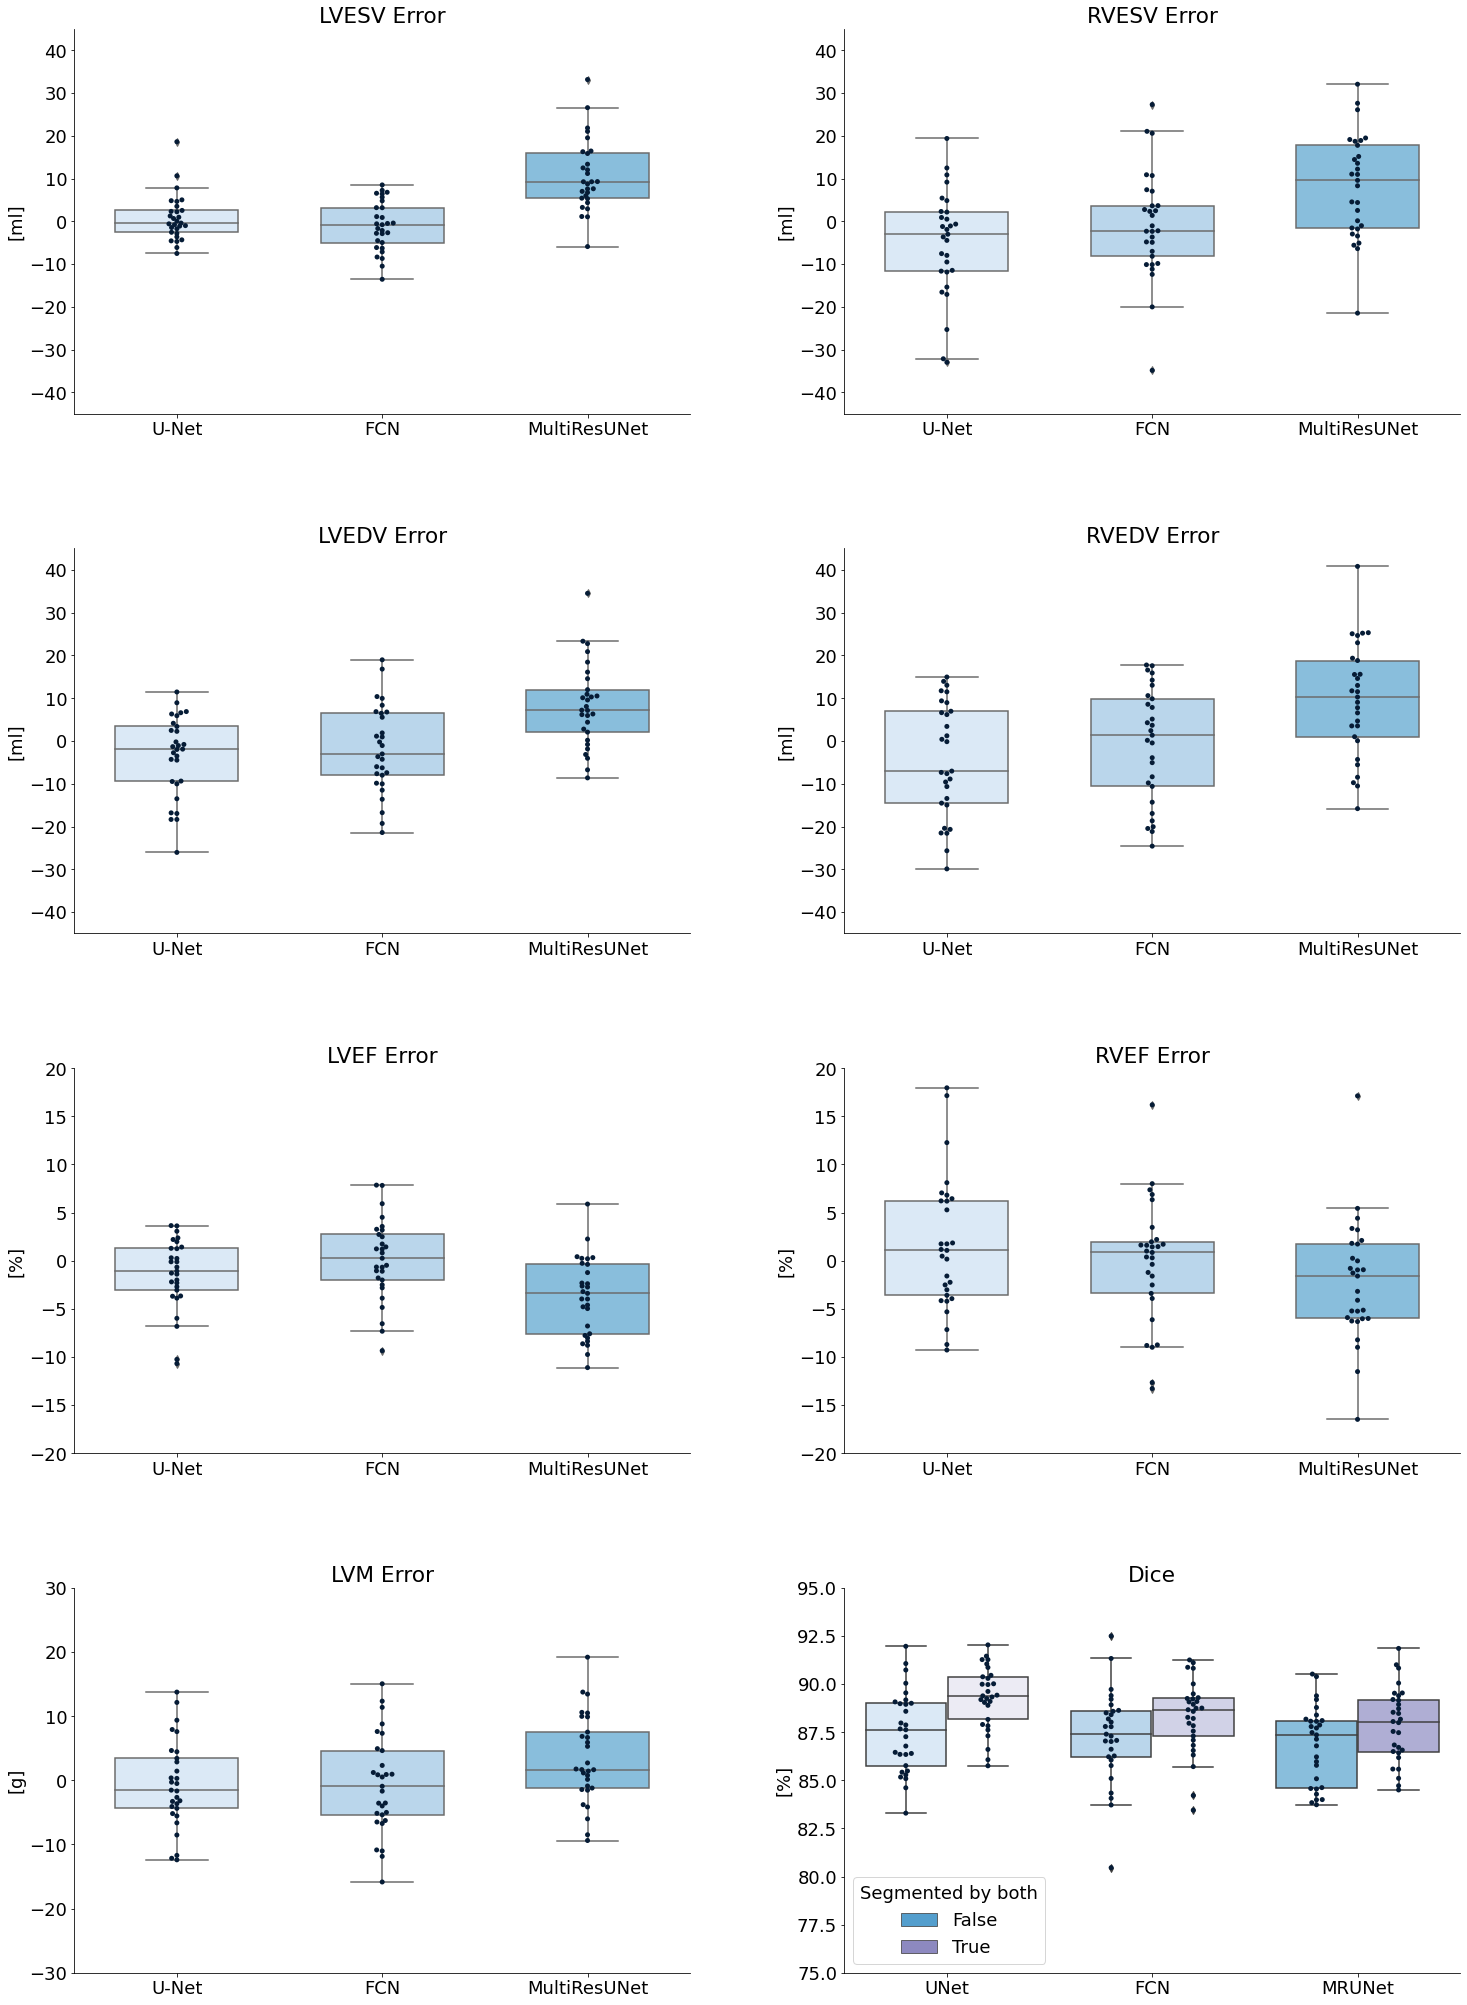

In [6]:
SAX_candlelight_plot(cases1, {'U-Net':cases4, 'FCN':cases2, 'MultiResUNet':cases3}, bp)

## Some random image comparisons

In [ ]:
# Just showing some images
for c1,c2 in zip(cases1, cases4):
    print(c1.case_name, c2.case_name)
    lves1, lved1 = [c for c in c1.categories if 'ES' in c.name][0], [c for c in c1.categories if 'ED' in c.name][0]
    cat2 = [c for c in c2.categories][0]
    esp, edp = lves1.phase, lved1.phase
    for d in range(lves1.nr_slices):
        for p in [esp, edp]:
            print('Slice: ', d, ',  Phase: ', p)
            img1, anno1 = lves1.get_img(d, p), lves1.get_anno(d, p)
            img2, anno2 = cat2 .get_img(d, p), cat2 .get_anno(d, p)
            #fig, axes = plt.subplots(1,5, figsize=(20,10))
            fig, axes = plt.subplots(1,3, figsize=(20,10))
            #for i in range(5): axes[i].imshow(img1,cmap='gray'); axes[i].axis('off')
            for i in range(3): axes[i].imshow(img1,cmap='gray'); axes[i].axis('off')
            anno1.plot_all_contour_outlines(axes[0])
            anno2.plot_all_contour_outlines(axes[1])
            #anno1.plot_cont_comparison(axes[2], anno2, 'lv_endo')
            #anno1.plot_cont_comparison(axes[3], anno2, 'lv_myo' )
            #anno1.plot_cont_comparison(axes[4], anno2, 'rv_endo')
            anno1.plot_cont_comparison(axes[2], anno2, 'lv_myo' )
            anno1.plot_cont_comparison(axes[2], anno2, 'rv_endo')
            fig.tight_layout()
            plt.show()
    break

## Find terrible segmentations

In [ ]:
metric = DiceMetric()
for c1,c2 in zip(cases1, cases4):
    cc = Case_Comparison(c1, c2)
    metric.set_case_comparison(cc)
    dice_dict = metric.calculate_all_vals(True)
    for sop, c in dice_dict.keys():
        if 0 < np.abs(dice_dict[(sop,c)]) < 65:
            print(c, 'dice: ', dice_dict[(sop,c)])
            img   = c1.get_img(sop)
            anno1 = c1.load_anno(sop)
            anno2 = c2.load_anno(sop)
            if not anno1.has_contour(c) or not anno2.has_contour(c): continue
            fig, ax = plt.subplots(1,1,figsize=(10,10))
            ax.imshow(img, interpolation='none', cmap='gray')
            anno1.plot_cont_comparison(ax, anno2, c)
            ax.axis('off')
            plt.show()

## Making metric by phase slice table

In [ ]:
metric_names  = ['dice', 'hd', 'ml diff', 'by reader1', 'by reader2', 'position1', 'position2']
contour_names = ['lv_endo', 'lv_myo', 'rv_endo']
ph_names      = ['ES', 'ED']

column_names  = ['case name', 'reader1', 'reader2', 'slice']
column_names += [cn+' '+p+' '+mn for cn in contour_names for p in ph_names for mn in metric_names]
print(len(column_names))
print(column_names)

In [ ]:
def get_position(case, d, p, cont_name):
    cat  = case.categories[0]
    anno = cat.get_anno(d, p)
    has_cont = anno.has_contour(cont_name)
    if not has_cont:                    return 'outside'
    if has_cont and d==0:               return 'basal'
    if has_cont and d==cat.nr_slices-1: return 'apical'
    prev_has_cont = cat.get_anno(d-1, p).has_contour(cont_name)
    next_has_cont = cat.get_anno(d+1, p).has_contour(cont_name)
    if prev_has_cont and next_has_cont: return 'midv'
    if prev_has_cont and not next_has_cont: return 'apical'
    if not prev_has_cont and next_has_cont: return 'basal'

    
def metrics_phase_slice_table(cases1, cases2, fixed_phase_first_reader=False):
    dsc, hd, mld = DiceMetric(), HausdorffMetric(), mlDiffMetric()
    metrics = [dsc.get_val, hd.get_val, mld.get_val, lambda g1,g2,_: not g1.is_empty, lambda g1,g2,_: not g2.is_empty]
    view = SAX_CINE_View()
    row_dict = {}
    row_counter = 0
    for c1,c2 in zip(cases1, cases2):
        cc = Case_Comparison(c1,c2)
        nr_slices = c1.categories[0].nr_slices
        for sl_nr in range(nr_slices):
            row = [c1.case_name if sl_nr==0 else '', c1.reader_name, c2.reader_name,  sl_nr]
            for cont in contour_names:
                cat_es1, cat_ed1 = view.get_categories(c1, cont)
                cat_es2, cat_ed2 = view.get_categories(c2, cont)
                p_es1, p_ed1 = cat_es1.phase, cat_ed1.phase 
                p_es2, p_ed2 = (p_es1, p_ed1) if fixed_phase_first_reader else (cat_es2.phase, cat_ed2.phase)
                for cat1, cat2 in zip([cat_es1, cat_ed1],[cat_es2, cat_ed2]):
                    p1, p2 = cat1.phase, cat1.phase if fixed_phase_first_reader else cat2.phase
                    dcm = cat1.get_dcm(sl_nr, p1)
                    cont1, cont2 = cat1.get_anno(sl_nr, p1).get_contour(cont), cat2.get_anno(sl_nr, p2).get_contour(cont)
                    for m in metrics: 
                        if p1 is None or p2 is None: row.append('')
                        else: row.append(m(cont1, cont2, dcm))
                    row.extend([get_position(c1, sl_nr, p1, cont), get_position(c2, sl_nr, p2, cont)])
            row_dict['row_'+str(row_counter).zfill(5)] = row
            row_counter +=1 
    df = pandas.DataFrame.from_dict(row_dict, orient='index', columns=column_names)
    return df
table = metrics_phase_slice_table(cases1, cases4, fixed_phase_first_reader=True)

In [ ]:
#display(table)
print(os.path.join(bp, 'metrics_slicephase_table.csv'))
pandas.DataFrame.to_csv(table, os.path.join(bp, 'metrics_slicephase_table_3.csv'), sep=';', decimal=',')

## Metric Plots